# Variational Inference Revisited

Variational inference (VI) is one of the standard methods for working with analytically intractable models, such as non-conjugate probabilistic models.
VI approximates an analytically intractable distribution with another distribution from a family of tractable distributions.
A typical choice which practitioners and researchers make is to choose a Gaussian family of distributions.
An $N$-dimensional multivariate Gaussian requires $N$ parameters to specify its mean and $\frac{N(N+1)}{2}$ parameters to specify its covariance.
Opper and Archembeau {cite}`opper2009variational` however have shown that for a certain class of probabilistic models, those which have a Gaussian prior and a factorising likelihood, the optimal posterior can be written in terms of the prior using only $N$, rather than $\frac{N(N+1)}{2}$, parameters.
This means that the optimal approximate posterior requires only need $2N$ parameters in total.
Here we derive the family of Gaussian variational posteriors introduced by Opper and Archembeau, and apply it to two examples of non-conjugate Gaussian Process (GP) models {cite}`williams2006gaussian` for classification and heavy-tailed regression.

## Prior asssumptions

Consider a model with a Gaussian prior, written as

$$\begin{align}
p(\mathbf{y}, \mathbf{z} | \theta) &= p(\mathbf{y} | \mathbf{z}, \theta) p(\mathbf{z} | \theta) \\
                                   &= p(\mathbf{y} | \mathbf{z}, \theta)~\mathcal{N}(\mathbf{z}; \mathbf{0}, \mathbf{K}).
\end{align}$$

Consider a model with a Gaussian prior and a factorising likelihood, written as

$$\begin{equation}
p(\mathbf{y}, \mathbf{z} | \theta) = p(\mathbf{z} | \theta) \prod_{n=1}^N p(y_n | z_n, \theta) = \mathcal{N}(\mathbf{z}; \mathbf{0}, \mathbf{K}) \prod_{n=1}^N p(y_n | z_n, \theta).
\end{equation}$$

In general, unless the likelihood is Gaussian, such a model will be analytically intractable, and will require approximations both for inferring the distribution over the latent variables $\mathbf{z}$ as well as learning good hyperparameters $\theta$.
Variational inference (VI) is a standard approximation for a setting such as this.

## Optimal variational posterior

We are interested in both inferring the distribution over the latent variables $\mathbf{z}$, as well as in learning good hyperparameters $\theta$.
We can achive this by approximating the posterior $p(\mathbf{z} | \mathbf{y}, \theta)$ with a Gaussian distribution $q(\mathbf{z}) = \mathcal{N}(\mathbf{z}; \boldsymbol{\mu}, \mathbf{\Sigma})$, and maximising the Variational Free Energy (VFE) objective

$$\begin{align}
\mathcal{F}(q, \theta) = \int q(\mathbf{z}) \log \frac{p(\mathbf{y}, \mathbf{z} | \mathbf{x}, \theta)}{q(\mathbf{z})} d\mathbf{z} \leq \log p(\mathbf{y}),
\end{align}$$

also known as the Evidence Lower Bound (ELBO), with respect to both the variatinal parameters $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$, as well as the hyperparameters $\theta$.
It would appear that parameterising $\boldsymbol{\Sigma}$ would require $\frac{N(N+1)}{2}$ parameters.
However, Opper and Archembeau {cite}`opper2009variational` show that the optimal posterior covariance can be written down with only $N$ parameters.

<div class="lemma">
    
**Lemma (Free energy for factorising model with a Gaussian prior)** Consider a model with a Gaussian prior and a factorising likelihood, written as

$$\begin{equation}
p(\mathbf{y}, \mathbf{z} | \theta) = \mathcal{N}(\mathbf{z}; \mathbf{0}, \mathbf{K}) \prod_{n=1}^N p(y_n | z_n, \theta).
\end{equation}$$
    
Assuming a Gaussian variational posterior $q(\mathbf{z}) = \mathcal{N}(\mathbf{z}; \boldsymbol{\mu}, \mathbf{K})$, the free energy $\mathcal{F}(q, \theta)$ of the model is
    
$$\begin{equation}
\mathcal{F}(q, \theta) = \sum_{n=1}^N \mathbb{E}_{q_n}\left[\log p(y_n | z_n, \theta)\right] - \frac{1}{2} \text{Tr}(\mathbf{K}^{-1}\boldsymbol{\Sigma}) - \boldsymbol{\mu}^\top\mathbf{K}^{-1}\boldsymbol{\mu} + \frac{1}{2} \log |\boldsymbol{\Sigma}| - \frac{1}{2} \log |\mathbf{K}| + C,
\end{equation}$$
    
where $C$ is a constant which does not depend on $\boldsymbol{\mu}, \boldsymbol{\Sigma}$ or $\theta$, and $q_n$ is the marginal distribution of $z_n$ under the variational posterior $q$.
Further, for fixed $\boldsymbol{\mu}$ and $\theta$, the $\boldsymbol{\Sigma}$ which minimises $\mathcal{F}(q, \theta)$ has the form
    
$$\begin{equation}
\boldsymbol{\Sigma} = \left(\mathbf{K}^{-1} + \boldsymbol{\Lambda} \right)^{-1},
\end{equation}$$
    
where $\boldsymbol{\Lambda}$ is a diagonal matrix.
    
</div>
<br>

<details class="proof">
<summary>Derivation: Free energy for factorising model with a Gaussian prior</summary>
    
$$\begin{align}
\mathcal{F}(q, \theta) &= \int q(\mathbf{z}) \log \frac{p(\mathbf{y}, \mathbf{z} | \theta)}{q(\mathbf{z})} d\mathbf{z} \\
                       &= \underbrace{\int q(\mathbf{z}) \log p(\mathbf{y} | \mathbf{z}, \theta) d\mathbf{z}}_{=~ \sum_{n=1}^N \mathbb{E}_{q_n}\left(\log p(y_n | z_n, \theta)\right)} + \int q(\mathbf{z}) \log p(\mathbf{z} | \theta) d\mathbf{z} - \int q(\mathbf{z}) \log q(\mathbf{z}) d\mathbf{z},
\end{align}$$
    
where we have used the factorising structure of the model.
Substituting the expressions $q(\mathbf{z}) = \mathcal{N}(\mathbf{z}; \boldsymbol{\mu}, \boldsymbol{\Sigma})$ and $p(\mathbf{z} | \theta) = \mathcal{N}(\mathbf{z}; \mathbf{0}, \mathbf{K})$ we obtain   
    
$$\begin{align}
\mathcal{F}(q, \theta) &= \sum_{n=1}^N \mathbb{E}_{q_n}\left[\log p(y_n | z_n, \theta)\right] + \frac{1}{2} \int q(\mathbf{z}) \left(- \log |\mathbf{K}| - \mathbf{z}^\top \mathbf{K}^{-1}\mathbf{z}\right)d\mathbf{z} - \frac{1}{2} \int q(\mathbf{z}) \left(-\log |\boldsymbol{\Sigma}| - (\mathbf{z} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{z} - \boldsymbol{\mu})\right) d\mathbf{z} + \text{ const.} \\
                       &= \sum_{n=1}^N \mathbb{E}_{q_n}\left[\log p(y_n | z_n, \theta)\right] - \frac{1}{2} \log |\mathbf{K}| - \text{Tr}(\mathbf{K}^{-1} \boldsymbol{\Sigma}) - \frac{1}{2} \boldsymbol{\mu}^\top \mathbf{K}^{-1} \boldsymbol{\mu} + \frac{1}{2} \log |\boldsymbol{\Sigma}| + \text{ const.}
\end{align}$$
    
where the constant terms do not depend on $\boldsymbol{\mu}, \boldsymbol{\Sigma}$ or $\boldsymbol{\theta}$.
Further, we can take a derivative with respect to $\boldsymbol{\Sigma}$, and set the resulting expression to zero to solve for the optimal $\boldsymbol{\Sigma}$.
We note that the $n^{th}$ log-likelihood term depends only on the $n^{th}$ diagonal entry of $\boldsymbol{\Sigma}$, and none of the non-diagonal entries.
Thus, taking a derivative with respect to $\boldsymbol{\Sigma}_{ij}$ we have
    
$$\begin{align}
\frac{d}{d\boldsymbol{\Sigma}_{ij}} \mathcal{F}(q, \theta) &= \underbrace{\delta_{ij} \frac{d}{d\boldsymbol{\Sigma}_{ii}} \mathbb{E}_{q_i}\left(\log p(y_i | z_i, \theta)\right)}_{- \boldsymbol{\Lambda}_{ij}} - \mathbf{K}_{ij}^{-1} + \boldsymbol{\Sigma}^{-1}_{ij}
\end{align}$$
    
where $\delta_{\cdot, \cdot}$ is the Kronecker delta function.
Defining the matrix $\boldsymbol{\Lambda}$ as shown above, setting the derivative equal to zero and rearraning, we obtain
    
$$\begin{align}
\boldsymbol{\Sigma} = \left(\mathbf{K}^{-1} + \boldsymbol{\Lambda}\right)^{-1}.
\end{align}$$

</details>
<br>

For given $\boldsymbol{\mu}$ and $\boldsymbol{\theta}$, the optimal precision is the prior precision plus a diagonal term.
Therefore, a sensible parameterisation for $\mathbf{\Sigma}$ is
    
$$\begin{equation}
\boldsymbol{\Sigma} \stackrel{\text{def}}{=} \left(\mathbf{K}^{-1} + \boldsymbol{\Lambda}\right)^{-1},
\end{equation}$$

where we let $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \dots, \lambda_N)$ be diagonal matrix with $N$ parameters which we constrain to be positive.
Using $N$ further parameters for the mean $\boldsymbol{\mu}$, we can parameterise a family of Gaussian variational posteriors which contains the optimal Gaussian variational posterior, using only $2N$ parameters.
This is a significant improvement in the memory cost over naive covariance parameterisations, such as parameterising a Cholesky factor of the $\boldsymbol{\Sigma}$ matrix.

In [138]:
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfd = tfp.distributions

from check_shape import check_shape
from tqdm import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import HTML, set_matplotlib_formats

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

set_matplotlib_formats('pdf', 'svg')
css_style = open('../../../_static/custom_style.css', 'r').read()
HTML(f'<style>{css_style}</style>')

## Implementation

In [120]:
class EQcovariance(tf.keras.Model):

    def __init__(self, 
                 log_coeff,
                 log_scales,
                 dim,
                 dtype,
                 trainable,
                 name='eq_covariance',
                 **kwargs):
        
        super().__init__(name=name, dtype=dtype, **kwargs)
    
        # Convert parameters to tensors
        log_coeff = tf.convert_to_tensor(log_coeff, dtype=dtype)
        log_scales = tf.convert_to_tensor(log_scales, dtype=dtype)

        # Reshape parameter tensors
        log_coeff = tf.squeeze(log_coeff)
        log_scales = tf.reshape(log_scales, (-1,))
        
        # Set input dimensionality
        self.dim = dim
        
        # Set EQ parameters
        self.log_scales = tf.Variable(log_scales, trainable=trainable)
        self.log_coeff = tf.Variable(log_coeff, trainable=trainable)
        
    def __call__(self,
                 x1,
                 x2,
                 diag=False,
                 epsilon=None):
        
        # Convert to tensors
        x1 = tf.convert_to_tensor(x1, dtype=self.dtype)
        x2 = tf.convert_to_tensor(x2, dtype=self.dtype)

        # Get vector of lengthscales
        scales = self.scales
        
        # If calculating full covariance, add dimensions to broadcast
        if not diag:

            x1 = x1[:, None, :]
            x2 = x2[None, :, :]

            scales = self.scales[None, None, :] ** 2

        # Compute quadratic, exponentiate and multiply by coefficient
        quad = - 0.5 * (x1 - x2) ** 2 / scales
        quad = tf.reduce_sum(quad, axis=-1)
        eq_cov = self.coeff ** 2 * tf.exp(quad)
        
        # Add jitter for invertibility
        if epsilon is not None:
            eps = tf.eye(eq_cov.shape[0], dtype=self.dtype)
            eq_cov = eq_cov + epsilon * eps

        return eq_cov
        
    @property
    def scales(self):
        return tf.math.exp(self.log_scales)
    
    @property
    def coeff(self):
        return tf.math.exp(self.log_coeff)

In [121]:
class NonConjugateGP(tfk.Model):
    
    def __init__(self,
                 x_train,
                 y_train,
                 covariance,
                 log_likelihood,
                 dtype,
                 epsilon=1e-5,
                 name="gp_binary_classifier",
                 **kwargs):
        
        super().__init__(name=name, dtype=dtype, **kwargs)
        
        self.dim = dim
        self.N = x_train.shape[0]
        
        check_shape([x_train, y_train], [(self.N, dim), (self.N,)])
        
        # Set training data and inducing point initialisation
        self.x_train = x_train
        self.y_train = y_train
        
        # Set mean, covariance and likelihood functions
        self.covariance = covariance
        self.log_likelihood = log_likelihood
        
        # Set variational parameters
        self.mu = tf.Variable(
            tf.zeros(shape=(self.N,),
                     dtype=self.dtype)
        )
        
        self.log_lamda = tf.Variable(
            -4. * tf.ones(shape=(self.N,), dtype=self.dtype)
        )
        
        # Set epsilon for jitter
        self.epsilon = epsilon
        
    @property
    def lamda(self):
        return tf.exp(self.log_lamda)
        
    def posterior(self, x_pred, num_samples):
        
        Kpp = self.covariance(x_pred, x_pred, epsilon=self.epsilon)
        Ktp = self.covariance(self.x_train, x_pred)
        Kpt = self.covariance(x_pred, self.x_train)
        Ktt = self.covariance(self.x_train, self.x_train, epsilon=self.epsilon)
        
        Sigma = self.q_covariance
        Sigma_chol = tf.linalg.cholesky(Sigma)
        
        qz = tfd.MultivariateNormalTriL(
            loc=self.mu,
            scale_tril=Sigma_chol
        )
        
        samples = qz.sample(sample_shape=(num_samples,))
        samples = tf.transpose(samples, [1, 0])
        
        mcond = Kpt @ tf.linalg.solve(Ktt, samples)
        mcond = tf.transpose(mcond, [1, 0])
        
        Kcond = Kpp - Kpt @ tf.linalg.solve(Ktt, Ktp)
        Kcond_chol = tf.linalg.cholesky(Kcond)
        
        qcond = tfd.MultivariateNormalTriL(
            loc=tf.zeros_like(mcond[0]),
            scale_tril=Kcond_chol
        )
        
        samples = mcond + qcond.sample(sample_shape=(num_samples,))
            
        return samples
        
        
    def free_energy(self, num_samples=1):
        
        cond_lik = tf.cast(tf.convert_to_tensor(0.), dtype=self.dtype)
        
        q = tfd.MultivariateNormalFullCovariance(
            loc=self.mu,
            covariance_matrix=self.q_covariance
        )
        
        p = tfd.MultivariateNormalFullCovariance(
            loc=tf.zeros(shape=self.y_train.shape, dtype=self.dtype),
            covariance_matrix=self.p_covariance
        )
        
        # Compute log likelihood contribution from each sample
        for i in tf.range(num_samples):
            
            z = q.sample()
            
            cond_lik = cond_lik + tf.reduce_sum(
                self.log_likelihood(self.y_train, z)
            )
            
        cond_lik = cond_lik / num_samples
        
        # Compute KL divergence contribution
        kl = tf.reduce_sum(q.kl_divergence(p))
        
        free_energy = cond_lik - kl
        
        return free_energy, cond_lik, kl
    
    @property
    def q_covariance(self):
        
        eye = tf.eye(self.N, dtype=self.dtype)
        
        Ktt = self.covariance(
            self.x_train,
            self.x_train,
            epsilon=self.epsilon
        )
        
        Ktt_chol = tf.linalg.cholesky(Ktt)
        iKtt = tf.linalg.cholesky_solve(Ktt_chol, eye)
        
        Lamda = tf.linalg.diag(self.lamda)
        
        iSigma_tril = tf.linalg.cholesky(iKtt + Lamda)
        W = tf.linalg.triangular_solve(iSigma_tril, eye)
        Sigma = tf.matmul(W, W, transpose_a=True)
        
        return Sigma
    
    @property
    def p_covariance(self):
        
        p_cov = self.covariance(
            self.x_train,
            self.x_train,
            epsilon=self.epsilon
        )
        
        return p_cov

## Experiments

### Binary Classification

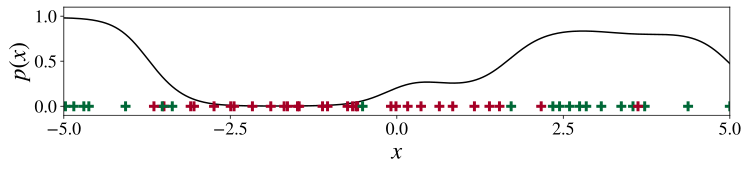

In [123]:
tf.random.set_seed(0)
np.random.seed(0)

dtype = tf.float64

num_grid = 400
num_train = 50

x_min = -5.
x_max = 5.

dim = 1
log_coeff = 1.
log_scales = dim * [0.]
trainable = False

covariance = EQcovariance(
    log_coeff,
    log_scales=log_scales,
    dim=dim,
    dtype=dtype,
    trainable=trainable,
)

x = tf.cast(tf.linspace(x_min, x_max, num_grid), dtype=dtype)[:, None]

Ktt = covariance(x, x) + 1e-9 * tf.eye(num_grid, dtype=dtype)
Lxx = tf.linalg.cholesky(Ktt)
z = tf.linalg.matvec(Lxx, tf.random.normal(shape=(num_grid,), dtype=dtype))
p = tf.nn.sigmoid(z)

idx = np.random.choice(np.arange(num_grid), size=(num_train,), replace=False)
idx = tf.convert_to_tensor(idx)[:, None]
x_train = tf.gather_nd(x, idx)
p_train = tf.gather_nd(p, idx)
y_train = tfp.distributions.Bernoulli(probs=p_train).sample()


plt.figure(figsize=(12, 2))
plt.plot(x[:, 0], p, color="black", zorder=1)
plt.scatter(x_train[:, 0], tf.zeros_like(y_train), s=100, linewidth=3, marker="+", c=y_train, cmap="RdYlGn", zorder=2)

plt.xlim([-5., 5.])
plt.ylim([-0.1, 1.1])

plt.xticks(np.linspace(-5., 5., 5), fontsize=18)
plt.yticks(np.linspace(0., 1., 3), fontsize=18)

plt.xlabel("$x$", fontsize=24)
plt.ylabel("$p(x)$", fontsize=24)

plt.show()

In [124]:
class BinaryClassificationLikelihood(tfk.Model):
    
    def __init__(self,
                 dtype,
                 name="binary_classification_likelihood",
                 **kwargs):
        
        super().__init__(name=name, dtype=dtype, **kwargs)
        
    def call(self, y, z):
        return tfd.Bernoulli(logits=z).log_prob(y)

In [125]:
dtype = tf.float64

trainable_covariance = False
dim = 1
log_coeff = 1.
log_scales = dim * [0.]
    
    
covariance = EQcovariance(
    log_coeff=log_coeff,
    log_scales=log_scales,
    dim=dim,
    dtype=dtype,
    trainable=trainable_covariance
)

binary_classification_likelihood = BinaryClassificationLikelihood(
    dtype=dtype
)

non_conjugate_gp = NonConjugateGP(
    x_train=x_train,
    y_train=y_train,
    covariance=covariance,
    log_likelihood=binary_classification_likelihood,
    dtype=dtype
)

In [126]:
# We decorate a single gradient descent step with tf.function. On the first
# call of single_step, tensorflow will compile the computational graph first.
# After that, all calls to single_step will use the compiled graph which is
# much faster than the default eager mode execution. In this case, the gain
# is roughly a x20 speedup (with a CPU), which can be checked by commenting
# out the decorator and rerunning the training script.

@tf.function
def single_step(model, optimiser):

    with tf.GradientTape() as tape:

        free_energy, cond_lik, kl = model.free_energy()
        loss = - free_energy / x.shape[0]

    gradients = tape.gradient(loss, model.trainable_variables)
    optimiser.apply_gradients(zip(gradients, model.trainable_variables))

    return free_energy, cond_lik, kl


num_steps = 50000

# Initialise optimiser
optimiser = tfk.optimizers.Adam(learning_rate=1e-3)
    
# Set progress bar and suppress warnings
progress_bar = tqdm(range(1, num_steps+1))
tf.get_logger().setLevel('ERROR')

# Set tensors for keeping track of quantities of interest
train_vfe = []
train_cond_lik = []
train_kl = []

# Train model
for i in progress_bar:
        
    free_energy, cond_lik, kl = single_step(
        model=non_conjugate_gp,
        optimiser=optimiser
    )

    if i % 1000 == 0:
        
        progress_bar.set_description(
            f"VFE {free_energy:.1f}, "
            f"Cond-lik. {cond_lik:.1f}, "
            f"KL {kl:.1f}"
        )
        
    train_vfe.append(free_energy)
    train_cond_lik.append(cond_lik)
    train_kl.append(kl)

VFE -23.7, Cond-lik. -17.8, KL 5.9: 100%|██████████| 50000/50000 [00:39<00:00, 1280.07it/s]


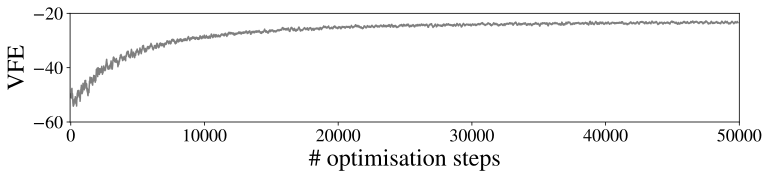

In [127]:
# Helper for computing moving average
def moving_average(array, n):
    
    cumsum = np.cumsum(array)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    
    moving_average = cumsum[n - 1:] / n
    
    return moving_average

plt.figure(figsize=(12, 2))

plt.plot(
    moving_average(tf.stack(train_vfe).numpy(), n=100),
    color="black",
    alpha=0.5
)

plt.xlim([-50, 50000])
plt.ylim([-60, -20])

plt.xticks(fontsize=18)
plt.yticks(np.linspace(-60, -20, 3), fontsize=18)

plt.xlabel("# optimisation steps", fontsize=24)
plt.ylabel("VFE", fontsize=24)

plt.show()

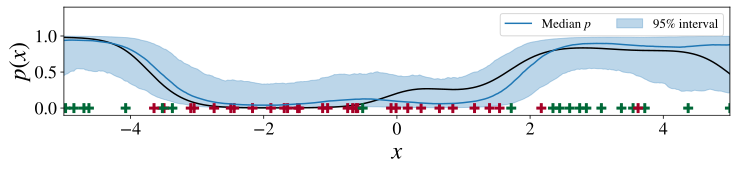

In [128]:
q = tfd.MultivariateNormalFullCovariance(
    loc=non_conjugate_gp.mu,
    covariance_matrix=non_conjugate_gp.q_covariance
)

sample_p = tf.nn.sigmoid(non_conjugate_gp.posterior(x_pred=x, num_samples=1000))
mean_p = tf.reduce_mean(sample_p, axis=0)

q1 = tfp.stats.percentile(sample_p, q=2.5, axis=0)
q2 = tfp.stats.percentile(sample_p, q=50, axis=0)
q3 = tfp.stats.percentile(sample_p, q=97.5, axis=0)

plt.figure(figsize=(12, 2))

plt.plot(
    x[:, 0],
    p,
    color="black",
    zorder=1
)

plt.plot(
    x[:, 0],
    q2,
    color="tab:blue",
    label="Median $p$"
)

plt.scatter(
    x_train[:, 0],
    tf.zeros_like(y_train),
    s=100,
    linewidth=3,
    marker="+",
    c=y_train,
    cmap="RdYlGn",
    zorder=2
)

plt.fill_between(
    x[:, 0],
    q1,
    q3,
    color="tab:blue",
    alpha=0.3,
    label="95% interval"
)

plt.xlim([-5., 5.])
plt.ylim([-0.1, 1.4])

plt.xticks(fontsize=18)
plt.yticks(np.linspace(-0., 1., 3), fontsize=18)

plt.legend(fontsize=13, ncol=2, loc="upper right")

plt.xlabel("$x$", fontsize=24)
plt.ylabel("$p(x)$", fontsize=24)

plt.show()

### Cauchy Regression

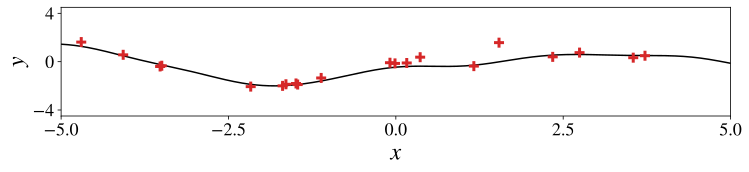

In [129]:
tf.random.set_seed(0)
np.random.seed(0)

dtype = tf.float64

num_grid = 400
num_train = 20

x_min = -5.
x_max = 5.

dim = 1
log_coeff = 0.
log_scales = dim * [0.]
log_noise = -2.
trainable = False

covariance = EQcovariance(
    log_coeff,
    log_scales=log_scales,
    dim=dim,
    dtype=dtype,
    trainable=trainable,
)

x = tf.cast(tf.linspace(x_min, x_max, num_grid), dtype=dtype)[:, None]

Ktt = covariance(x, x) + 1e-9 * tf.eye(num_grid, dtype=dtype)
Lxx = tf.linalg.cholesky(Ktt)
z = tf.linalg.matvec(Lxx, tf.random.normal(shape=(num_grid,), dtype=dtype))
noise = tf.cast(tf.exp(log_noise), dtype=dtype)

idx = np.random.choice(np.arange(num_grid), size=(num_train,), replace=False)
idx = tf.convert_to_tensor(idx)[:, None]
x_train = tf.gather_nd(x, idx)
z_train = tf.gather_nd(z, idx)
y_train = tfp.distributions.Cauchy(loc=z_train, scale=noise*tf.ones_like(z_train)).sample()

plt.figure(figsize=(12, 2))

plt.plot(x[:, 0], z, color="black", zorder=1)
plt.scatter(x_train[:, 0], y_train, s=100, linewidth=3, marker="+", c="tab:red", zorder=2)

plt.xlim([-5., 5.])
plt.ylim([-4.5, 4.5])

plt.xticks(np.linspace(-5., 5., 5), fontsize=18)
plt.yticks(np.linspace(-4., 4., 3), fontsize=18)

plt.xlabel("$x$", fontsize=24)
plt.ylabel("$y$", fontsize=24)

plt.show()

In [130]:
class CauchyLikelihood(tfk.Model):
    
    def __init__(self,
                 log_noise,
                 dtype,
                 name="binary_classification_likelihood",
                 **kwargs):
        
        super().__init__(name=name, dtype=dtype, **kwargs)
        
        # Set log noise parameter
        self.log_noise = tf.cast(
            tf.convert_to_tensor(log_noise),
            dtype=self.dtype
        )
        
        self.log_noise = tf.Variable(self.log_noise)
        
    def call(self, y, z):
        return tfd.Cauchy(loc=z, scale=self.noise).log_prob(y)
    
    @property
    def noise(self):
        return tf.exp(self.log_noise)

In [131]:
dtype = tf.float64

trainable_covariance = False
dim = 1
log_coeff = 1.
log_scales = dim * [0.]
log_noise = -2.
    
covariance = EQcovariance(
    log_coeff=log_coeff,
    log_scales=log_scales,
    dim=dim,
    dtype=dtype,
    trainable=trainable_covariance
)

Cauchy_likelihood = CauchyLikelihood(
    log_noise=log_noise,
    dtype=dtype
)

non_conjugate_gp = NonConjugateGP(
    x_train=x_train,
    y_train=y_train,
    covariance=covariance,
    log_likelihood=Cauchy_likelihood,
    dtype=dtype
)

In [132]:
@tf.function
def single_step(model, optimiser):

    with tf.GradientTape() as tape:

        free_energy, cond_lik, kl = model.free_energy()
        loss = - free_energy / x.shape[0]

    gradients = tape.gradient(loss, model.trainable_variables)
    optimiser.apply_gradients(zip(gradients, model.trainable_variables))

    return free_energy, cond_lik, kl


num_steps = 50000

# Initialise optimiser
optimiser = tfk.optimizers.Adam(learning_rate=1e-3)
    
# Set progress bar and suppress warnings
progress_bar = tqdm(range(1, num_steps+1))
tf.get_logger().setLevel('ERROR')

# Set tensors for keeping track of quantities of interest
train_vfe = []
train_cond_lik = []
train_kl = []

# Train model
for i in progress_bar:
        
    free_energy, cond_lik, kl = single_step(
        model=non_conjugate_gp,
        optimiser=optimiser
    )

    if i % 1000 == 0:
        
        progress_bar.set_description(
            f"VFE {free_energy:.1f}, "
            f"Cond-lik. {cond_lik:.1f}, "
            f"KL {kl:.1f}"
        )
        
    train_vfe.append(free_energy)
    train_cond_lik.append(cond_lik)
    train_kl.append(kl)

VFE -19.6, Cond-lik. 2.3, KL 21.9: 100%|██████████| 50000/50000 [00:27<00:00, 1804.11it/s]  


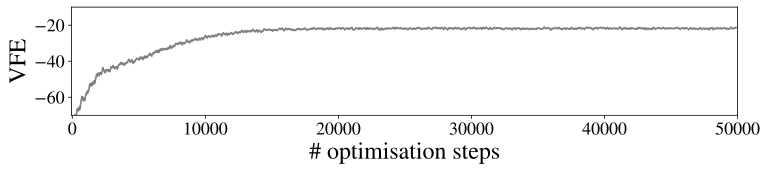

In [137]:
plt.figure(figsize=(12, 2))

plt.plot(
    moving_average(tf.stack(train_vfe).numpy(), n=100),
    color="black",
    alpha=0.5
)

plt.xlim([-50, 50000])
plt.ylim([-70, -10])

plt.xticks(fontsize=18)
plt.yticks(np.linspace(-60, -20, 3), fontsize=18)

plt.xlabel("# optimisation steps", fontsize=24)
plt.ylabel("VFE", fontsize=24)

plt.show()

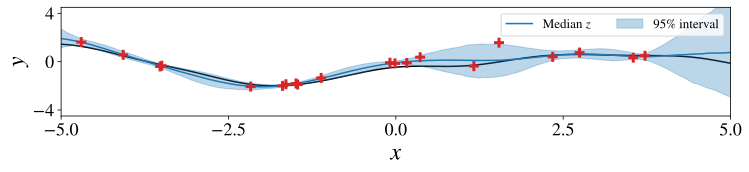

In [133]:
q = tfd.MultivariateNormalFullCovariance(
    loc=non_conjugate_gp.mu,
    covariance_matrix=non_conjugate_gp.q_covariance
)

sample_z = non_conjugate_gp.posterior(x_pred=x, num_samples=1000)
mean_z = tf.reduce_mean(sample_p, axis=0)

q1 = tfp.stats.percentile(sample_z, q=2.5, axis=0)
q2 = tfp.stats.percentile(sample_z, q=50, axis=0)
q3 = tfp.stats.percentile(sample_z, q=97.5, axis=0)

plt.figure(figsize=(12, 2))

plt.plot(
    x[:, 0],
    z,
    color="black",
    zorder=1
)

plt.plot(
    x[:, 0],
    q2,
    color="tab:blue",
    label="Median $z$"
)

plt.scatter(
    x_train[:, 0],
    y_train,
    s=100,
    linewidth=3,
    marker="+",
    c="tab:red",
    zorder=3
)

plt.fill_between(
    x[:, 0],
    q1,
    q3,
    color="tab:blue",
    alpha=0.3,
    zorder=2,
    label="95% interval"
)

plt.xlim([-5., 5.])
plt.ylim([-4.5, 4.5])

plt.xticks(np.linspace(-5., 5., 5), fontsize=18)
plt.yticks(np.linspace(-4., 4., 3), fontsize=18)

plt.xlabel("$x$", fontsize=24)
plt.ylabel("$y$", fontsize=24)

plt.legend(fontsize=13, ncol=2)

plt.show()

## References

```{bibliography} ./references.bib
```